# Metastasis Detection and Quantification in Histological Stains (Track 1)


# Introduction and Background

Hematoxylin and Eosin (H&E) staining is one of the most widely used techniques for imaging tissue structures under a microscope. It provides a contrast between cellular components, making it useful in medical diagnostics and research. In this technique, hematoxylin stains cell nuclei blue or purple by binding to nucleic acids, identifying cell nuclei. Eosin stains the cytoplasm and other structures pink or red. This allows the differentiation of tissue components, including the distinction between normal and pathological areas, such as cancerous tissues.

H&E staining is widely used because it is simple to apply and cost-effective in detecting abnormalities, including metastases. However, H&E results lack consistency compared to other techniques like immunohistochemistry (IHC). It cannot label tumor cells directly and requires an experienced pathologist to determine whether a cluster of cells represents metastasis based on the context of cellular morphology and nuclear arrangement. This process can introduce subjectivity and, therefore, variability between different observers.

H-and-E-Staining-Overview-A-Guide-to-Best-Practices-img10.jpg

Left: H&E result, red arrow indicates tumor cells
Right: IHC result, tumor cells are brown, normal cells are blue.



The development of machine learning for analyzing H&E-stained whole slide images (WSI) has gained significant clinical success. Various research groups have utilized deep learning models to detect tumor metastases in sentinel lymph nodes, as demonstrated in the Camelyon challenges (16 and 17), grade cancer stages, and categorize diagnostic outcomes with high accuracy. However, these models cannot directly apply to cancer biology research due to their different training targets and objectives.

In clinical settings, metastatic cancer cells shed from advanced-stage primary tumors and form metastases (Mets), with staining results typically showing low numbers of metastatic clusters. Machine learning models trained for clinical use often operate with a binary outcome (presence or absence of Mets in lymph node images). In cancer staging or diagnostic categorizing problems, the outcomes are limited to a few discrete categories. In contrast, cancer biology research involves introducing cancer cells into immunodeficient mice to generate metastases and quantify the number of metastases in different tissue samples. This allows researchers to assess whether a treatment can inhibit metastasis by reducing the number of metastatic clusters, which can be high in numbers. Therefore, more precise segmentation is required in research applications than clinical models.

For this project, we plan to use immunohistochemistry (IHC) staining results as ground truth, leveraging data from publicly available online databases.[1] A key challenge in using IHC as a ground truth lies in its imperfect alignment with hematoxylin and eosin (H&E) staining since these stains are obtained from consecutive, yet distinct, tissue slides. To mitigate this issue, we will focus on the number of tumor cells rather than pixel-wise precision for training, as we base our approach on the assumption from prior research that the ratio of tumor to normal tissue area remains consistent at corresponding locations across the two slides.

Generative Adversarial Networks (GANs) provide a adversarial learning framework where a generator creates images, while a discriminator evaluates them, making GANs highly suitable for biomedical image processing. In this project, we will explore two different GAN-based methods to generate Ki67 IHC-stained images from H&E slides.

First, we will employ pix2pix[2,3], a conditional GAN model that requires paired input images for training. Here, we will use a modified version called pyramid pix2pix, and use a pre-trained model to generate IHC-like images from H&E. Second, we will use CycleGAN[4], which does not require paired image inputs, thus providing a flexible option for unpaired training sets. By implementing these two approaches, we aim to improve the accuracy of our results and offer a novel way to evaluate potential treatment effectiveness.



1. Petríková, D., Cimrák, I., Tobiášová, K., & Plank, L. (2024). Ki67 expression classification from HE images with semi-automated computer-generated annotations. In Proceedings of the 17th International Joint Conference on Biomedical Engineering Systems and Technologies - Volume 1: BIOINFORMATICS (pp. 536-544). SciTePress. https://doi.org/10.5220/0012535900003657
2. Isola, P., Zhu, J. Y., Zhou, T., & Efros, A. A. (2017). Image-to-Image Translation with Conditional Adversarial Networks. Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 1125-1134.
3. Zhang, X., Yu, J., & Wang, Y. (2022). Multi-Scale Pyramid pix2pix for Enhanced Image-to-Image Translation in Biomedical Imaging. IEEE Transactions on Medical Imaging, 41(5), 1380-1392.
4. Zhu, J. Y., Park, T., Isola, P., & Efros, A. A. (2017). Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks. Proceedings of the IEEE International Conference on Computer Vision (ICCV), 2223-2232.

# Data Collection and Preprocessing

##Download the Datasets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
download 77 pairs of registered and aligned mouse testicular seminoma images from https://zenodo.org/records/11218961

In [ ]:
!wget -O /content/drive/MyDrive/CIT5810_Final_Project/HE&IHC/testicular_seminoma_mouse/01.zip https://zenodo.org/records/11218961/files/01.zip?download=1

--2024-10-16 17:15:03--  https://snd.se/en/catalogue/dataset/2022-190-1/download/test.zip
Resolving snd.se (snd.se)... 130.241.170.87
Connecting to snd.se (snd.se)|130.241.170.87|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-16 17:15:04 ERROR 404: Not Found.



In [ ]:
for i in range(2, 40):
    file_number = str(i).zfill(2)

    url = f"https://zenodo.org/records/11218961/files/{file_number}.zip?download=1"
    destination = f"/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/{file_number}.zip"

    !wget -O {destination} {url}

--2024-10-17 16:24:58--  https://zenodo.org/records/11218961/files/09.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.103.159, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3682034922 (3.4G) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/09.zip’

/content/drive/MyDr 100%[===================>]   3.43G  25.8MB/s    in 2m 43s  

2024-10-17 16:27:41 (21.6 MB/s) - ‘/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/09.zip’ saved [3682034922/3682034922]

--2024-10-17 16:27:41--  https://zenodo.org/records/11218961/files/10.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4774161616 (4.4G) [ap

In [ ]:
!unzip /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/01.zip -d /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/

Archive:  /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/08.zip
  inflating: /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/08/15_HE_slide-031-A2-S1-B6.png  
  inflating: /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/08/15_Ki67_slide-032-A2-S2-B7.png  
  inflating: /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/08/16_HE_slide-033-A2-S1-B8.png  
  inflating: /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/08/16_Ki67_slide-034-A2-S2-B9.png  


In [ ]:
for i in range(2, 40):
    file_number = str(i).zfill(2)

    url = f"/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/{file_number}.zip"
    destination = "/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/"

    !unzip -d {destination} {url}

Archive:  /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/09.zip
  inflating: /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/09/17_HE_slide-037-A2-S1-B12.png  
  inflating: /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/09/17_Ki67_slide-038-A2-S2-B13.png  
  inflating: /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/09/18_HE_slide-039-A2-S1-B14.png  
  inflating: /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/09/18_Ki67_slide-040-A2-S2-B15.png  
Archive:  /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/10.zip
  inflating: /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/10/19_HE_slide-041-A2-S1-B16.png  
  inflating: /content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/10/19_Ki67_slide-042-A2-S2-B17.png  
  inflating: /content/drive/MyDrive/CIT5810_Final_Projec

In [ ]:
import os
import shutil

source_folder = "/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/01"
destination_folder = "/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse"
files = os.listdir(source_folder)
for file in files:
    source = os.path.join(source_folder, file)
    destination = os.path.join(destination_folder, file)
    shutil.move(source, destination)

print("Success")

Success


In [ ]:
for i in range(2, 40):
    file_number = str(i).zfill(2)
    source_folder = f"/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/{file_number}"
    destination_folder = "/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse"
    files = os.listdir(source_folder)
    for file in files:
        source = os.path.join(source_folder, file)
        destination = os.path.join(destination_folder, file)
        shutil.move(source, destination)
        print(file_number)

02
02
02
02
03
03
03
03
04
04
04
04
05
05
05
05
06
06
06
06
07
07
07
07
08
08
08
08
09
09
09
09
10
10
10
10
11
11
11
11
12
12
12
12
13
13
13
13
14
14
14
14
15
15
15
15
16
16
16
16
17
17
17
17
18
18
18
18
19
19
19
19
20
20
20
20
21
21
21
21
22
22
22
22
23
23
23
23
24
24
24
24
25
25
25
25
26
26
26
26
27
27
27
27
28
28
28
28
29
29
29
29
30
30
30
30
31
31
31
31
32
32
32
32
33
33
33
33
34
34
34
34
35
35
35
35
36
36
36
36
37
37
37
37
38
38
38
38
39
39


##Divide large WSIs into patches
paired WSIs are not perfectly aligned,, extracting fixed-size patches (e.g.,
256×256 or 512×512) results in the loss of correlation between the pairs.

Larger patches gives higher correlation

In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
import gc
import glob
import shutil
#import openslide
#import pyslide

In [ ]:
def load_image(image_path):
      #print(image_path)

      slide = Image.open("/content/01_Ki67.tiff")

      return slide.read_region((0, 0), 0, slide.dimensions).convert("RGB")

In [ ]:
image_path = "/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/01_Ki67_slide-002-A1-S2-B2.png"

if os.path.exists(image_path):
    print("File found!")


File found!


In [ ]:
# Increase the pixel limit (or remove the limit entirely)
Image.MAX_IMAGE_PIXELS = None

def load_image(image_path):
    try:

        image = Image.open(image_path).convert("RGB")
        #print("loaded")
        return image
    except Exception as e:
        print("Error loading")
        return None

In [ ]:
def save_patch(patch, output_dir, WSI, x, y):
    patch_name = f"{WSI}_x{x}_y{y}.png"
    patch_path = os.path.join(output_dir, patch_name)
    patch.save(patch_path)

In [ ]:
def tile_image(image, patch_size, overlap, output_path, base_name="IHC"):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    width,height = image.size if isinstance(image,Image.Image) else image.shape[1::-1]

    pw, ph=patch_size

    for y in range(0, height-ph +1, ph-overlap):
        for x in range(0, width-pw+1, pw- overlap):
            if isinstance(image, Image.Image):
                patch = image.crop((x,y, x + pw,y + ph))
            else:
                patch = image[y:y +ph, x:x+ pw]

            save_patch(patch, output_path,base_name, x, y)

In [ ]:
image_path ="/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/01_Ki67_slide-002-A1-S2-B2.png"
output_dir ="/content/drive/MyDrive/CIT5810_Final_Project/IHC_patch"
tile_size =(512*8,512*8)
overlap= 400

# Load images
image =load_image(image_path)
tile_image(image,tile_size, overlap,output_dir,"IHC")

loaded


In [ ]:
image.size

(31104, 31938)

In [ ]:
tile_size =(512*8, 512*8)
overlap =400
image_path ="/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/01_HE_slide-001-A1-S1-B1.png"
output_dir ="/content/drive/MyDrive/CIT5810_Final_Project/HE_patch"
image = load_image(image_path)
tile_image(image, tile_size,overlap,output_dir,"HE")

loaded


In [ ]:
image.size

(31104, 31938)

In [ ]:
image_path ="/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/02_Ki67_slide-006-A1-S2-B6.png"
output_dir ="/content/drive/MyDrive/CIT5810_Final_Project/IHC_patch"
tile_size = (512*8, 512*8)
overlap =400

# Load images
image = load_image(image_path)
tile_image(image, tile_size, overlap, output_dir,"IHC_02")

loaded


In [ ]:
tile_size = (512*8, 512*8)
overlap = 400
image_path = "/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/02_HE_slide-005-A1-S1-B5.png"
output_dir = "/content/drive/MyDrive/CIT5810_Final_Project/HE_patch"
image = load_image(image_path)
tile_image(image, tile_size, overlap, output_dir, "HE_02")

loaded


In [ ]:
base_path = "/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/"
pattern = "03_Ki67_slide*"

# Search for file
matching_files = glob.glob(base_path + pattern)
if matching_files:
    print("found 03")
    print(matching_files)


found 03
['/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/03_Ki67_slide-008-A1-S2-B8.png']


In [ ]:
for i in range(47,78):
  base_path = "/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/"
  pattern_IHC = f"{i:02}_Ki67_slide*"
  pattern_HE = f"{i:02}_HE_slide*"
  matching_files_IHC = glob.glob(base_path + pattern_IHC)
  print(matching_files_IHC)
  matching_files_HE = glob.glob(base_path + pattern_HE)
  print(matching_files_HE)
  output_IHC = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_patch"
  output_HE = "/content/drive/MyDrive/CIT5810_Final_Project/HE_patch"

  tile_size = (512*8, 512*8)
  overlap = 400

  image_IHC = load_image(matching_files_IHC[0])
  tile_image(image_IHC, tile_size, overlap, output_IHC, f"IHC_{i:02}")

  image_HE = load_image(matching_files_HE[0])
  tile_image(image_HE, tile_size, overlap, output_HE, f"HE_{i:02}")

  del image_IHC, image_HE
  gc.collect()

['/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/47_Ki67_slide-102-A5-S2-B2.png']
['/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/47_HE_slide-101-A5-S1-B1.png']
['/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/48_Ki67_slide-104-A5-S2-B4.png']
['/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/48_HE_slide-103-A5-S1-B3.png']
['/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/49_Ki67_slide-106-A5-S2-B6.png']
['/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/49_HE_slide-105-A5-S1-B5.png']
['/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/50_Ki67_slide-108-A5-S2-B8.png']
['/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/50_HE_slide-107-A5-S1-B7.png']
['/content/drive/MyDrive/CIT5810_Final_Project/Histo/testicular_seminoma_mouse/51_Ki67_slide-110-A5-S2-B10.png']

In [ ]:
base_path = "/content/drive/MyDrive/CIT5810_Final_Project/HE_patch/"
pattern = "HE_36*"
matching_files = glob.glob(base_path + pattern)
print(matching_files[0])


/content/drive/MyDrive/CIT5810_Final_Project/HE_patch/HE_36_x0_y0.png


## Image preprocessing

### Filter out patches of only or mostly background

In [ ]:
def background_check(image_path, save_path, threshold=250, white_ratio_cut=0.6):

    img =Image.open(image_path)

    img_gray=img.convert('L')# grayscale

    img_array=np.array(img_gray)
    total_pixels= img_array.size

    white_pixels =np.sum(img_array >= threshold)

    #Calculate ratio
    ratio = white_pixels / total_pixels
    #print(ratio)
    if ratio <white_ratio_cut:
      img.save(save_path)


The paper mentioned in introduction used 80% for IHC, and 60% for HE.
Here, we aim for more slide information.
For IHC, threshold is 60% of background

In [ ]:
background_check(
    image_path="/content/drive/MyDrive/CIT5810_Final_Project/IHC_patch/IHC_02_x18480_y14784.png",
    save_path="/content/drive/MyDrive/CIT5810_Final_Project/IHC_WHITE_CLEANED/IHC_02_x18480_y14784.png",
    threshold=250, #manually checked image using imageJ
    white_ratio_cut=0.6
)

In [ ]:
for filename in os.listdir("/content/drive/MyDrive/CIT5810_Final_Project/IHC_patch/"):

  image_path = os.path.join("/content/drive/MyDrive/CIT5810_Final_Project/IHC_patch/", filename)
  save_path = os.path.join("/content/drive/MyDrive/CIT5810_Final_Project/IHC_WHITE_CLEANED/", filename)
  if save_path in os.listdir("/content/drive/MyDrive/CIT5810_Final_Project/IHC_WHITE_CLEANED/"):
    continue
  background_check(image_path, save_path, 250, 0.6)

In [ ]:
len(os.listdir("/content/drive/MyDrive/CIT5810_Final_Project/IHC_WHITE_CLEANED/"))

3235

For HE, threshold is 40% of background

In [ ]:
for filename in os.listdir("/content/drive/MyDrive/CIT5810_Final_Project/HE_patch/"):

  image_path = os.path.join("/content/drive/MyDrive/CIT5810_Final_Project/HE_patch/",filename)
  save_path = os.path.join("/content/drive/MyDrive/CIT5810_Final_Project/HE_WHITE_CLEANED/",filename)
  if save_path in os.listdir("/content/drive/MyDrive/CIT5810_Final_Project/HE_WHITE_CLEANED/"):
    continue
  background_check(image_path, save_path, 250, 0.4)

In [ ]:
len(os.listdir("/content/drive/MyDrive/CIT5810_Final_Project/HE_WHITE_CLEANED/"))

### Filter out image pairs that are too different from each other

Some papers use pearson correlation for similarity between 2 images. But from the PC-GAN paper, SSIM was used for loss function, so we decide to use SSIM to measure similarities between image pairs.

The most commomly used 0.6 threshold is too high for our images due to the shift between paired slides.

Here, we use 0.4 as cutline.

In [ ]:
'''calculate Structural Similarity Index (SSIM) between HE and IHC image pairs, filter out those with very low correlation'''
from skimage.metrics import structural_similarity as ssim
#pick a pair that's not similar
img1 = cv2.imread('/content/drive/MyDrive/CIT5810_Final_Project/HE_WHITE_CLEANED/HE_x18480_y22176.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/drive/MyDrive/CIT5810_Final_Project/IHC_patch/IHC_x18480_y22176.png', cv2.IMREAD_GRAYSCALE)
score, _ = ssim(img1, img2, full=True)
print(score)

0.07194757672293185


In [ ]:
#pick a pair that looks similar
img1 = cv2.imread('/content/drive/MyDrive/CIT5810_Final_Project/HE_WHITE_CLEANED/HE_x22176_y22176.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/drive/MyDrive/CIT5810_Final_Project/IHC_patch/IHC_x22176_y22176.png', cv2.IMREAD_GRAYSCALE)
score, _ = ssim(img1, img2, full=True)
print(score)

0.4765419578000238


For all images from 2nd pair, SSIM is low for paired patches. We will set the threshold to 0.4

In [ ]:
base_path_IHC = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_WHITE_CLEANED/"
pattern_IHC = "IHC_02_x*_y*.png"
matching_files_IHC = glob.glob(base_path_IHC + pattern_IHC)
base_path_HE = "/content/drive/MyDrive/CIT5810_Final_Project/HE_WHITE_CLEANED/"
pattern_HE = "HE_02_x*_y*.png"
matching_files_HE = glob.glob(base_path_HE + pattern_HE)
IHC_paired_path = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_paired/"
HE_paired_path = "/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/"

for img in matching_files_IHC:
  img_name_IHC = img.split("/")[-1]
  img_name_HE = img_name_IHC.replace("IHC", "HE")
  img_HE = base_path_HE + img_name_HE
  if img_HE in matching_files_HE:
    img1 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img_HE, cv2.IMREAD_GRAYSCALE)
    score, _ = ssim(img1, img2, full=True)
    print(score)
    if score > 0.4:
      shutil.copy(img, IHC_paired_path)
      shutil.copy(img_HE, HE_paired_path)


0.46086542602599545
0.29664027940559473
0.1657457144328935
0.3192838915935797
0.1593019019220089
0.11001067644094037
0.3053855845091739
0.09469177443251123
0.2144990983865725
0.31363282260299025
0.11578994175153462
0.07824347468509074
0.07577292217815308
0.10832888249406432
0.22550589930538445
0.2247665328674307
0.13932529876782795
0.12045134453765141
0.1539404172104159
0.15454274205347815
0.4719309805639777
0.24509438819104268
0.13384029478432713
0.12198894328317127
0.1443165976829177
0.5029236311548547
0.39365984010609234
0.46462169809613546
0.11195054737242019


From the numbers above, we decide to use 0.4 as threshold.

In [ ]:
#base_path_IHC = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_WHITE_CLEANED/"
pattern_IHC = "IHC_x*_y*.png"
matching_files_IHC = glob.glob(base_path_IHC + pattern_IHC)
#base_path_HE = "/content/drive/MyDrive/CIT5810_Final_Project/HE_WHITE_CLEANED/"
pattern_HE = "HE_x*_y*.png"
matching_files_HE = glob.glob(base_path_HE + pattern_HE)
#IHC_paired_path = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_paired/"
#HE_paired_path = "/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/"

for img in matching_files_IHC:
  img_name_IHC = img.split("/")[-1]
  img_name_HE = img_name_IHC.replace("IHC", "HE")
  img_HE = base_path_HE + img_name_HE
  if img_HE in matching_files_HE:
    img1 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img_HE, cv2.IMREAD_GRAYSCALE)
    score, _ = ssim(img1, img2, full=True)
    print(score)
    if score > 0.4:
      shutil.copy(img, IHC_paired_path)
      shutil.copy(img_HE, HE_paired_path)

0.31894378102247944
0.08769275601161805
0.3157254142385802
0.1176272820952025
0.19451568255720347
0.1257332858966181
0.048805034615309016
0.05315300078011655
0.35608509914993947
0.16780896313846413
0.039108169493412545
0.04091677789900036
0.04705832940220337
0.052263476734611826
0.4203330923502079
0.4141519662304077
0.23420719399655232
0.04061407623792016
0.04822850380225606
0.044325698426224296
0.6074193292490314
0.24361927002506611
0.0455255883672508
0.04577431992747355
0.04648573636950632
0.22506194460408435
0.10035275376349025
0.07194757672293185
0.4765419578000238
0.5744922022923985


In [ ]:
for i in range(3,78):
  pattern_IHC=f"IHC_{i:02}_x*_y*.png"
  matching_files_IHC = glob.glob(base_path_IHC + pattern_IHC)

  pattern_HE =f"HE_{i:02}_x*_y*.png"
  matching_files_HE =glob.glob(base_path_HE + pattern_HE)



  for img in matching_files_IHC:
    img_name_IHC=img.split("/")[-1]
    img_name_HE =img_name_IHC.replace("IHC", "HE")
    img_HE = base_path_HE + img_name_HE
    if img_HE in matching_files_HE:
      img1 =cv2.imread(img, cv2.IMREAD_GRAYSCALE)
      img2 =cv2.imread(img_HE, cv2.IMREAD_GRAYSCALE)
      score,_= ssim(img1, img2, full=True)
      if score > 0.4:
        print(score)
        shutil.copy(img, IHC_paired_path)
        shutil.copy(img_HE, HE_paired_path)

0.5516063828427772
0.44148249786194493
0.5375424360293614
0.539742758495387
0.44330593434508975
0.41706541870003133
0.4190973525837382
0.5110415753450812
0.47608036532926795
0.4442606916041728
0.40802727136843037
0.41396494341990914
0.41319247651844954
0.40090759474602516
0.47376126685698444
0.4869691684882438
0.4648196844062646
0.4283608876027274
0.41652215606830895
0.4240733392677391
0.44390669641682357
0.5754567289327674
0.4435118683260878
0.4454956658128682
0.5371558860098528
0.423891842468714
0.4730710134382634
0.4313762109436196
0.6075659535805128
0.6268355628644593
0.41713317308998654
0.44677333816023596
0.49725030896134725
0.40424096584671293
0.4687275098331001
0.5095429343345125
0.5529173017631309
0.4861910920114847
0.4744406085452885
0.48410550633193644
0.5159915429017641
0.4804865587197201
0.4807830509847883
0.42125103902248057
0.509124346479186
0.5440579067658373
0.45777470950802135
0.4974415193309741
0.5211822891683546
0.5194657111010913
0.4209072895880304
0.41629767490592

In [ ]:
len(os.listdir("/content/drive/MyDrive/CIT5810_Final_Project/IHC_paired/"))

215

Manually delete all the images that are not suitable for training, then remove unpaired images

In [ ]:
IHC_dir = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_paired/"
HE_dir = "/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/"

ihc_img = os.listdir(IHC_dir)
he_img = os.listdir(HE_dir)
#print(ihc_img[0].replace("IHC", "HE"))
#print(he_img)
for img in ihc_img:
  img_he_check = img.replace("IHC", "HE")
  if img_he_check not in he_img:
    print(IHC_dir + img)
    os.remove(IHC_dir + img)

for img in he_img:
  img_ihc_check = img.replace("HE", "IHC")
  if img_ihc_check not in ihc_img:
    print(HE_dir + img)
    os.remove(HE_dir + img)

/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_10_x22176_y3696.png
/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_10_x25872_y11088.png
/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_26_x22176_y14784.png
/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_30_x25872_y7392.png
/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_33_x29568_y29568.png
/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_34_x11088_y7392.png
/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_44_x25872_y22176.png
/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_63_x33264_y11088.png
/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_64_x40656_y11088.png
/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_64_x40656_y14784.png
/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_65_x18480_y33264.png


In [ ]:
len(os.listdir("/content/drive/MyDrive/CIT5810_Final_Project/IHC_paired/"))

206

In [ ]:
len(os.listdir("/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/"))

206

## developing ground truth

The paper used (blue pixel)/(blue pixel+brown pixel) for tumor area calculation as ground truth.

Here, we tried simple thresholding with otsu, and confirmed that thresholding in H and D channels cannot generate proper segmentation results.

In [ ]:
from skimage import data, io, img_as_ubyte
from skimage.color import rgb2hed, hed2rgb
from skimage.exposure import rescale_intensity

In [ ]:
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

ihc_rgb =io.imread("/content/drive/MyDrive/CIT5810_Final_Project/IHC_paired/IHC_77_x33264_y33264.png")
hed_image = rgb2hed(ihc_rgb)

H = hed_image[:, :, 0]
D = hed_image[:, :, 2]

H_thresh = threshold_otsu(H)
D_thresh = threshold_otsu(D)

H_binary = (H > H_thresh).astype(float)
D_binary = (D > D_thresh).astype(float)

print(H_binary.shape)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ihc_rgb)
axes[0].set_title("Original IHC/H&E Image")
axes[0].axis("off")

# H channel
axes[1].imshow(H_binary, cmap="gray")
axes[1].set_title("Hematoxylin Channel (H)")
axes[1].axis("off")

# D channel
axes[2].imshow(D_binary, cmap="gray")
axes[2].set_title("Ki67 Channel (D)")
axes[2].axis("off")

plt.show()

NameError: name 'rgb2hed' is not defined

### segmentation with Stardist

tutorial: https://www.youtube.com/watch?v=L3dZ6fgmllI

code adapted from the author's github

Instead of recoloring the image into brown and blue for background removal, we utilized StarDist to count normal and tumor cells. By summing up the total normal tissue area and tumor area, we calculated the tumor ratio.

Since Ki67 exclusively stains the nuclei of tumor cells, StarDist enables precise calculation of nuclei for all cells. This approach provides a more accurate comparison of tumor versus normal tissue proportions.

In [ ]:
# Separate the individual stains from the IHC image
def color_separate(ihc_rgb):

    #Convert the RGB image to HED using the prebuilt skimage method
    ihc_hed = rgb2hed(ihc_rgb)

    # Create an RGB image for each of the separated stains
    #Convert them to ubyte for easy saving to drive as an image
    null = np.zeros_like(ihc_hed[:, :, 0])
    ihc_h = img_as_ubyte(hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1)))
    ihc_e = img_as_ubyte(hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1)))
    ihc_d = img_as_ubyte(hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1)))

    #Optional fun exercise of combining H and DAB stains into a single image with fluorescence look

    h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1),
                          in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))
    d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1),
                          in_range=(0, np.percentile(ihc_hed[:, :, 2], 99)))

# Cast the two channels into an RGB image, as the blue and green channels
#Convert to ubyte for easy saving as image to local drive
    zdh = img_as_ubyte(np.dstack((null, d, h))) #DAB in green and H in Blue

    return (ihc_h, ihc_e, ihc_d, zdh)

In [ ]:
ihc_rgb =io.imread("/content/drive/MyDrive/CIT5810_Final_Project/IHC_paired/IHC_77_x33264_y33264.png")
H,E,D,HD = color_separate(ihc_rgb)

Text(0.5, 1.0, 'E image')

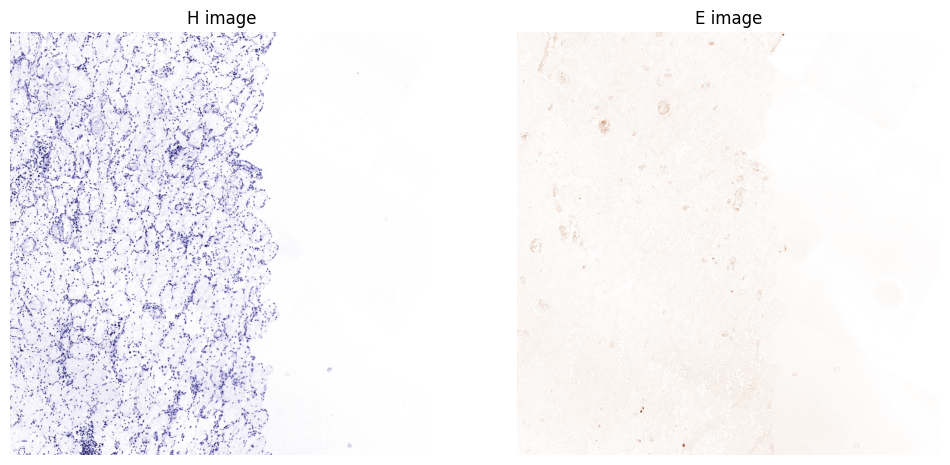

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H)
plt.axis("off")
plt.title("H image")

plt.subplot(1,2,2)
plt.imshow(D)
plt.axis("off")
plt.title("E image")

In [ ]:
!pip install stardist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 3.9 MB/s eta 0:00:00


In [ ]:
from stardist.models import StarDist2D
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize

In [ ]:
StarDist2D.from_pretrained()

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


In [ ]:
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
5320433/5320433 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [ ]:
H_img = np.invert(H[:,:,2])
D_img = np.invert(D[:,:,2])
#plt.imshow(D_img, cmap='gray')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H_img, cmap='gray')
plt.axis("off")
plt.title("H image")

plt.subplot(1,2,2)
plt.imshow(D_img, cmap='gray')
plt.axis("off")
plt.title("D image")

Text(0.5, 1.0, 'D image')

In [ ]:
D_img_crop = D_img[1000:2000,1000:2000]


In [ ]:
D_labels, D_details = model.predict_instances(normalize(D_img_crop))

In [ ]:
H_img_crop = H_img[1000:2000,1000:2000]

In [ ]:
H_labels, H_details = model.predict_instances(normalize(H_img_crop))

Text(0.5, 1.0, 'prediction + input overlay')

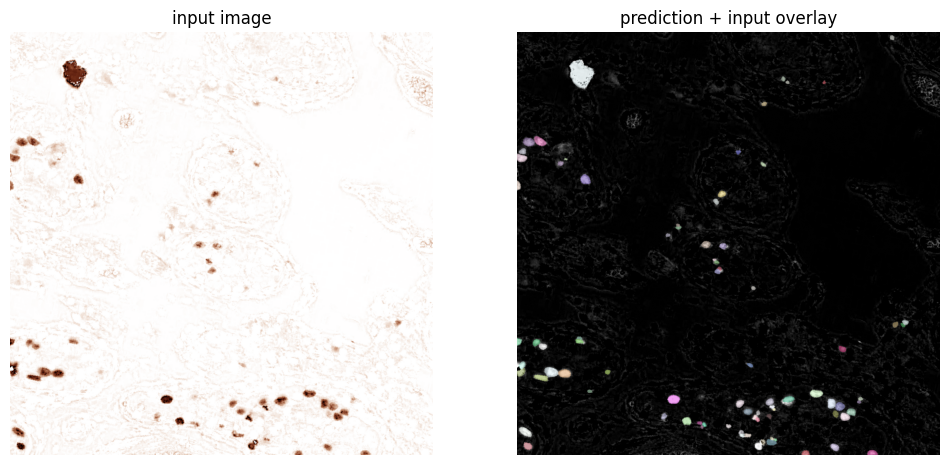

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(D[1000:2000,1000:2000])
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(D_labels, img=D_img_crop))
plt.axis("off")
plt.title("prediction + input overlay")

Text(0.5, 1.0, 'prediction + input overlay')

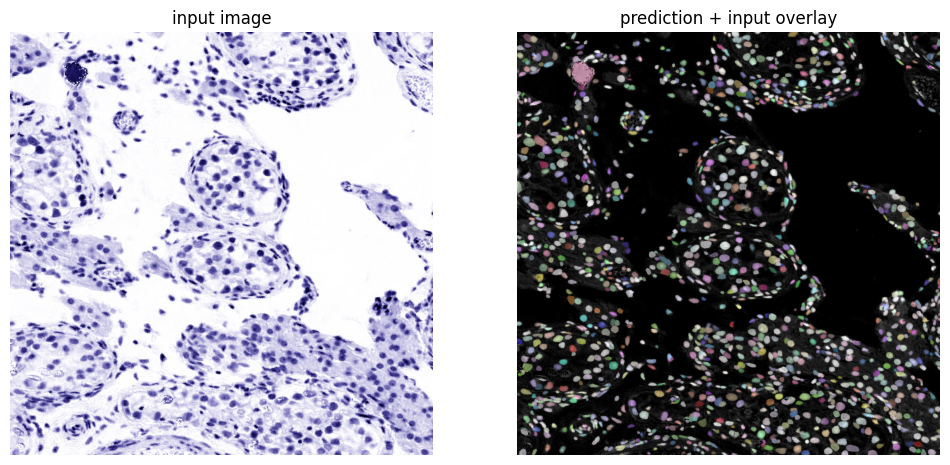

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H[1000:2000,1000:2000])
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(H_labels, img=H_img_crop))
plt.axis("off")
plt.title("prediction + input overlay")

Text(0.5, 1.0, 'prediction + input overlay')

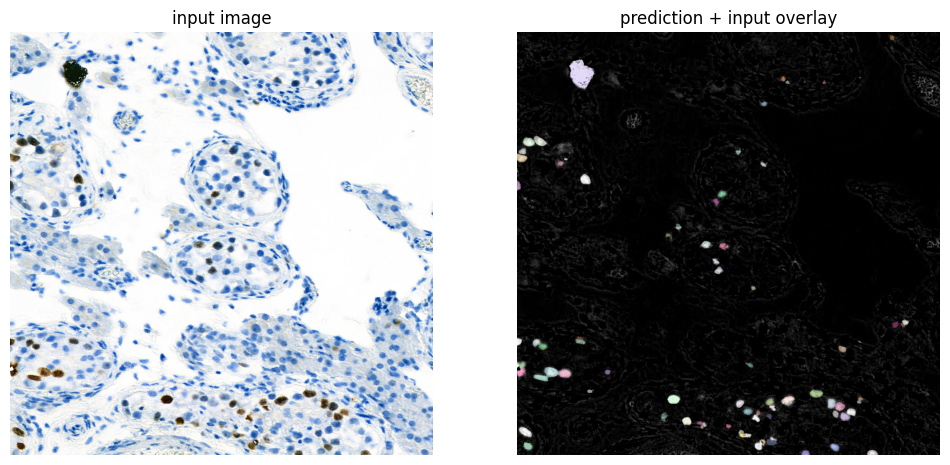

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(ihc_rgb[1000:2000,1000:2000])
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(D_labels, img=D_img_crop))
plt.axis("off")
plt.title("prediction + input overlay")

In [ ]:
from skimage.measure import regionprops_table
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_paired/"
result = []

for filename in os.listdir(path):
    if filename.endswith(".png"):
        image_path = os.path.join(path, filename)
        img = io.imread(image_path)
        ihc_h, __, ihc_d, ___ = color_separate(img)
        H_img = np.invert(ihc_h[:,:,2])
        D_img = np.invert(ihc_d[:,:,2])

        #model = StarDist2D.from_pretrained('2D_versatile_fluo')

        H_labels, H_details = model.predict_instances(normalize(H_img))

        D_labels, D_details = model.predict_instances(normalize(D_img))

        H_props = regionprops_table(H_labels, H_img,
                          properties=['area'])
        H_analysis_results = pd.DataFrame(H_props)


        D_props = regionprops_table(D_labels, D_img,
                          properties=['area'])
        D_analysis_results = pd.DataFrame(D_props)

        H_total_area = H_analysis_results["area"].sum()
        D_total_area = D_analysis_results["area"].sum()

        positivity = D_total_area / (D_total_area + H_total_area)
        ratio_formatted = f"{positivity:.4f}"
        print(filename, "'s positivity ratio is: ", ratio_formatted)

        result.append([filename, ratio_formatted])


IHC_02_x22176_y3696.png 's positivity ratio is:  0.1491
IHC_02_x22176_y22176.png 's positivity ratio is:  0.2013
IHC_02_x7392_y29568.png 's positivity ratio is:  0.0722
IHC_02_x11088_y29568.png 's positivity ratio is:  0.1400
IHC_x22176_y11088.png 's positivity ratio is:  0.1514
IHC_x3696_y14784.png 's positivity ratio is:  0.0745
IHC_x22176_y14784.png 's positivity ratio is:  0.1801
IHC_x22176_y22176.png 's positivity ratio is:  0.2292
IHC_x22176_y25872.png 's positivity ratio is:  0.1250
IHC_03_x22176_y7392.png 's positivity ratio is:  0.0953
IHC_03_x18480_y7392.png 's positivity ratio is:  0.1612
IHC_03_x11088_y11088.png 's positivity ratio is:  0.1588
IHC_03_x36960_y18480.png 's positivity ratio is:  0.3078
IHC_03_x36960_y22176.png 's positivity ratio is:  0.2698
IHC_06_x11088_y25872.png 's positivity ratio is:  0.0947
IHC_06_x36960_y29568.png 's positivity ratio is:  0.1490
IHC_06_x25872_y33264.png 's positivity ratio is:  0.0784
IHC_06_x29568_y33264.png 's positivity ratio is:  0

In [ ]:
import csv

path = "/content/drive/MyDrive/CIT5810_Final_Project/"
with open(path+"tumor_ratios_IHC_Stardist.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image', 'Tumor_Ratio'])
    writer.writerows(result)



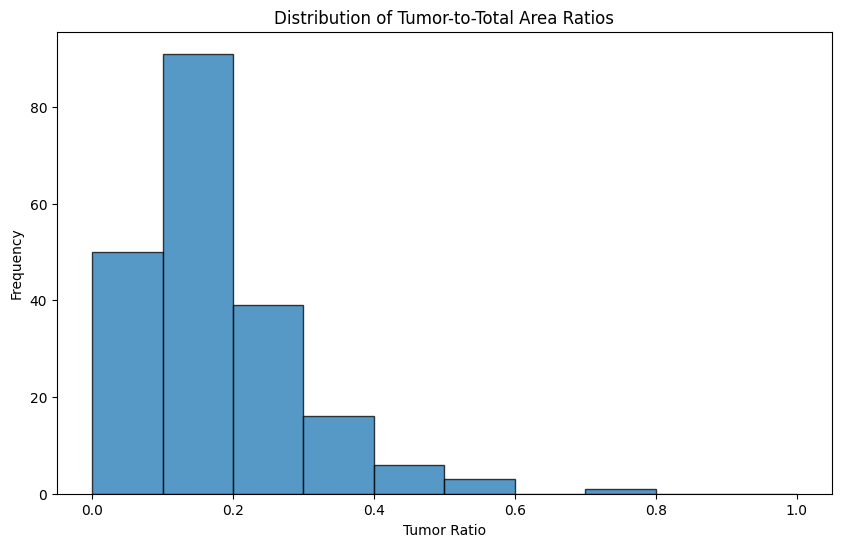

In [ ]:
import matplotlib.pyplot as plt


ratios = [float(row[1]) for row in result]

plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=10, edgecolor='black', range=(0, 1), alpha=0.75)
plt.title('Distribution of Tumor-to-Total Area Ratios')
plt.xlabel('Tumor Ratio')
plt.ylabel('Frequency')


# Display the plot
plt.show()

The results indicate that the tumor ratio is less skewed toward zero compared to the findings in the original paper.

Next, we applied the same method to H&E-stained images. However, identifying tumor cells in H&E stains requires features beyond color information from different channels, making the process more complex.

In [ ]:
he_rgb =io.imread("/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/HE_62_x22176_y7392.png")
H,E,D,HD = color_separate(he_rgb)

Text(0.5, 1.0, 'E image')

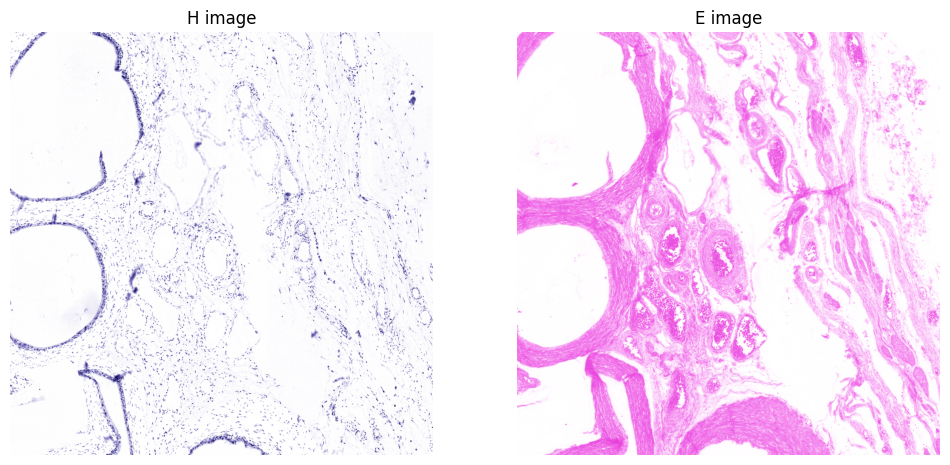

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H)
plt.axis("off")
plt.title("H image")

plt.subplot(1,2,2)
plt.imshow(E)
plt.axis("off")
plt.title("E image")

Not going to work with H&E images. Color of the object is less important. Nuclear size, color balance, nuclear arrangement all contribute to the final decision.

#Train ilastik model with interactive API


ilastik is a versatile tool designed for image analysis and segmentation tasks, offering a user-friendly interface that allows users to manually label data for segmentation. By utilizing a random forest algorithm, ilastik classifies pixels into user-defined groups with high accuracy.

For our analysis, we labeled blue regions as tumor areas and brown regions as tissue areas. This method, in theory, should produce a tumor ratio distribution that more closely aligns with the results presented in the original paper. Our IHC segmentation results confirmed this, demonstrating the effectiveness of ilastik in achieving accurate tumor-to-tissue ratio measurements.

## Segmentation of IHC images

Here we downloaded 10 IHC patches, manually label background, nucleus, and cell regions on 7 of the patches, and use the rest 3 to check for accuracy.


In [ ]:
!apt-get update
!apt-get install -y xvfb python3-pyqt5 libilmbase25 libopenexr25 libraw1394-11
!apt-get install -y xvfb x11-utils

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,110 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,616 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

Download and install ilastik

In [ ]:
%cd "/content/drive/MyDrive/CIT5810_Final_Project"

/content/drive/MyDrive/CIT5810_Final_Project


In [ ]:
!ls

 5810_Final_project_pixel_HE.ilp	 IHC_generated
 5810_Final_project_pixel.ilp		 IHC_ilastik_segmentation
 BCI					 IHC_ilastik_segmentation_2
'Group 24_5810_Final_Project.gdoc'	 IHC_paired
 HE_ilastik_segmentation		 IHC_patch
 HE_ilastik_segmentation_2		 IHC_patch_01
 he_images_pretrained			 IHC_WHITE_CLEANED
 HE_paired				 ilastik-1.4.0.post1-Linux
 HE_patch				 ilastik-1.4.0.post1-Linux.tar.bz2
 HE_WHITE_CLEANED			'Project idea.docx'
 Histo					 pytorch-CycleGAN-and-pix2pix
 IHC_02_x11088_y29568_segmentation.png	 temp_store
 IHC_02_x22176_y22176_segmentation.png	 tumor_ratios_IHC_Stardist.csv


In [ ]:
!tar -xjf ilastik-1.4.0.post1-Linux.tar.bz2

In [ ]:
!ls

 5810_Final_project_pixel_HE.ilp	 IHC_generated
 5810_Final_project_pixel.ilp		 IHC_ilastik_segmentation
 BCI					 IHC_ilastik_segmentation_2
'Group 24_5810_Final_Project.gdoc'	 IHC_paired
 HE_ilastik_segmentation		 IHC_patch
 HE_ilastik_segmentation_2		 IHC_patch_01
 he_images_pretrained			 IHC_WHITE_CLEANED
 HE_paired				 ilastik-1.4.0.post1-Linux
 HE_patch				 ilastik-1.4.0.post1-Linux.tar.bz2
 HE_WHITE_CLEANED			'Project idea.docx'
 Histo					 pytorch-CycleGAN-and-pix2pix
 IHC_02_x11088_y29568_segmentation.png	 temp_store
 IHC_02_x22176_y22176_segmentation.png	 tumor_ratios_IHC_Stardist.csv


Pre-train model interactively with ilastik

upload pre-trained model (.ilp) and batch process all the IHC patches

In [ ]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /content/drive/MyDrive/CIT5810_Final_Project


In [ ]:
#!chmod +x /content/drive/MyDrive/CIT5810_Final_Project/ilastik-1.4.0.post1-Linux/run_ilastik.sh

In [ ]:
!xvfb-run --auto-servernum --server-args='-screen 0 640x480x24' \
  /content/drive/MyDrive/CIT5810_Final_Project/ilastik-1.4.0.post1-Linux/run_ilastik.sh --headless \
  --project=/content/drive/MyDrive/CIT5810_Final_Project/5810_Final_project_pixel.ilp \
  --raw_data /content/drive/MyDrive/CIT5810_Final_Project/IHC_paired/*.png \
  --output_format="png" \
  --output_filename_format="/content/drive/MyDrive/CIT5810_Final_Project/IHC_ilastik_segmentation_2/{nickname}_Simple Segmentation.png"




INFO ilastik.app: Using tiktorch executable: ['/content/drive/MyDrive/CIT5810_Final_Project/ilastik-1.4.0.post1-Linux/bin/python', '-m', 'tiktorch.server']
INFO ilastik.app: config file location: <none>
INFO ilastik.app: Starting ilastik from "/content/drive/MyDrive/CIT5810_Final_Project/ilastik-1.4.0.post1-Linux/lib/python3.7".
Starting ilastik from "/content/drive/MyDrive/CIT5810_Final_Project/ilastik-1.4.0.post1-Linux/lib/python3.7".
WARNING 2024-11-15 18:35:13,612 opConservationTracking 26365 133310338471744 Could not find any ILP solver
WARNING 2024-11-15 18:35:13,732 opStructuredTracking 26365 133310338471744 Could not find any ILP solver
WARNING 2024-11-15 18:35:13,749 structuredTrackingWorkflow 26365 133310338471744 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!
INFO ilastik.shell.projectManager: Opening Project: /content/drive/MyDrive/CIT5810_Final_Project/5810_Final_project_pixel.ilp
INFO ilastik.workflo

## Segmentation of the HE images

Next, we repeated the same process of training and batch processing on H&E-stained slides.

Given that these slides contain numerous micro-metastases, which are notoriously challenging to detect, the labeling process can be subjective and somewhat arbitrary. This subjectivity introduces variability, making accurate segmentation and classification more difficult.

In [ ]:
!xvfb-run --auto-servernum --server-args='-screen 0 640x480x24' \
  /content/drive/MyDrive/CIT5810_Final_Project/ilastik-1.4.0.post1-Linux/run_ilastik.sh --headless \
  --project=/content/drive/MyDrive/CIT5810_Final_Project/5810_Final_project_pixel_HE.ilp \
  --raw_data /content/drive/MyDrive/CIT5810_Final_Project/HE_paired/*.png \
  --output_format="png" \
  --output_filename_format="/content/drive/MyDrive/CIT5810_Final_Project/HE_ilastik_segmentation_2/{nickname}_Simple Segmentation.png"

INFO ilastik.app: Using tiktorch executable: ['/content/drive/MyDrive/CIT5810_Final_Project/ilastik-1.4.0.post1-Linux/bin/python', '-m', 'tiktorch.server']
INFO ilastik.app: config file location: <none>
INFO ilastik.app: Starting ilastik from "/content/drive/MyDrive/CIT5810_Final_Project/ilastik-1.4.0.post1-Linux/lib/python3.7".
Starting ilastik from "/content/drive/MyDrive/CIT5810_Final_Project/ilastik-1.4.0.post1-Linux/lib/python3.7".
WARNING 2024-11-16 05:26:03,083 opConservationTracking 15760 139665694463808 Could not find any ILP solver
WARNING 2024-11-16 05:26:03,222 opStructuredTracking 15760 139665694463808 Could not find any ILP solver
WARNING 2024-11-16 05:26:03,235 structuredTrackingWorkflow 15760 139665694463808 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!
INFO ilastik.shell.projectManager: Opening Project: /content/drive/MyDrive/CIT5810_Final_Project/5810_Final_project_pixel_HE.ilp
INFO ilastik.work

## Calculate Tumor Area as ground truth and baseline

### calculate IHC tumor area as ground truth

In [ ]:
def tumor_ratio(image_path):

    img = Image.open(image_path)

    img_array = np.array(img)

    red_channel = img_array[:, :, 0]
    green_channel = img_array[:, :, 1]
    blue_channel = img_array[:, :, 2]

    tumor_area = np.sum((blue_channel > red_channel) & (blue_channel > green_channel))
    #print("Tumor: ", tumor_area)

    normal_area = np.sum((green_channel > red_channel) & (green_channel > blue_channel))
    #print("Tissue: ", normal_area)

    tumor_ratio = tumor_area / (tumor_area + normal_area)


    return tumor_ratio


In [ ]:
print(tumor_ratio("/content/drive/MyDrive/CIT5810_Final_Project/IHC_ilastik_segmentation/IHC_x22176_y25872_Simple Segmentation.png"))

0.1551332458140649


In [ ]:
import csv

path = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_ilastik_segmentation_2/"
result = []

for filename in os.listdir(path):
    if filename.endswith(".png"):
        image_path = os.path.join(path, filename)
        ratio = tumor_ratio(image_path)
        ratio_formatted = f"{ratio:.4f}"
        result.append([filename, ratio_formatted])




KeyboardInterrupt: 

In [ ]:
with open(path+"tumor_ratios.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image', 'Tumor_Ratio'])
    writer.writerows(result)

In [ ]:
result

In [ ]:
import matplotlib.pyplot as plt


ratios = [float(row[1]) for row in result]

plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=10, edgecolor='black', range=(0, 1), alpha=0.75)
plt.title('Distribution of Tumor-to-Total Area Ratios')
plt.xlabel('Tumor Ratio')
plt.ylabel('Frequency')


# Display the plot
plt.show()

### calculate HE tumor area as baseline

In [ ]:
path = "/content/drive/MyDrive/CIT5810_Final_Project/HE_ilastik_segmentation_2/"
result = []

for filename in os.listdir(path):
    if filename.endswith(".png"):
        image_path = os.path.join(path, filename)
        ratio = tumor_ratio(image_path)
        ratio_formatted = f"{ratio:.4f}"
        result.append([filename, ratio_formatted])

with open(path+"tumor_ratios.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image', 'Tumor_Ratio'])
    writer.writerows(result)

In [ ]:
result

In [ ]:
with open(path+"tumor_ratios.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image', 'Tumor_Ratio'])
    writer.writerows(result)

In [ ]:
ratios = [float(row[1]) for row in result]

plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=10, edgecolor='black', range=(0, 1), alpha=0.75)
plt.title('Distribution of Tumor-to-Total Area Ratios in HE')
plt.xlabel('Tumor Ratio')
plt.ylabel('Frequency')


plt.show()

## Accuracy of Segmentation

Set accurate segmentation of HE as tumor ratio between IHC and HE image pairs < *0.05*

In [ ]:
import pandas as pd

file_path_IHC = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_ilastik_segmentation_2/"
file_path_HE = "/content/drive/MyDrive/CIT5810_Final_Project/HE_ilastik_segmentation_2/"

df_IHC = pd.read_csv(file_path_IHC+"tumor_ratios.csv")
df_HE = pd.read_csv(file_path_HE+"tumor_ratios.csv" )

df_HE['Image'] = df_HE['Image'].str.replace('HE', 'IHC', regex=False)

df_IHC.rename(columns={'Tumor_Ratio': 'Tumor_Ratio_IHC'}, inplace=True)
df_HE.rename(columns={'Tumor_Ratio': 'Tumor_Ratio_HE'}, inplace=True)

merged_df = pd.merge(df_IHC,df_HE , on='Image', how='inner')
merged_df["difference"] = merged_df["Tumor_Ratio_IHC"] - merged_df["Tumor_Ratio_HE"]


In [ ]:
merged_df


Image  Tumor_Ratio_IHC  \
0     IHC_02_x7392_y29568_Simple Segmentation.png           0.0125   
1    IHC_03_x11088_y11088_Simple Segmentation.png           0.0273   
2     IHC_03_x18480_y7392_Simple Segmentation.png           0.0189   
3     IHC_03_x22176_y7392_Simple Segmentation.png           0.0191   
4    IHC_03_x36960_y18480_Simple Segmentation.png           0.0036   
..                                            ...              ...   
201     IHC_x22176_y11088_Simple Segmentation.png           0.0812   
202     IHC_x22176_y14784_Simple Segmentation.png           0.0992   
203     IHC_x22176_y22176_Simple Segmentation.png           0.1044   
204     IHC_x22176_y25872_Simple Segmentation.png           0.0095   
205      IHC_x3696_y14784_Simple Segmentation.png           0.0287   

     Tumor_Ratio_HE  difference  
0            0.0466     -0.0341  
1            0.3276     -0.3003  
2            0.0310     -0.0121  
3            0.0099      0.0092  
4            0.0060     -0.0024  
..              ...         ...  
201          0.2023     -0.1211  
202          0.2240     -0.1248  
203          0.0662      0.0382  
204          0.0021      0.0074  
205          0.0507     -0.0220  

[206 rows x 4 columns]

In [ ]:
merged_df["difference_binary"] = merged_df["difference"].apply(lambda x: 1 if abs(x) < 0.05 else 0)

In [ ]:
Accuracy=merged_df["difference_binary"].sum()/len(merged_df)

In [ ]:
Accuracy

0.7524271844660194

Relax the cutline to 0.1

In [ ]:
merged_df["difference_binary_0.1"]=merged_df["difference"].apply(lambda x:1 if abs(x)< 0.1   else 0)

In [ ]:
Accuracy_relaxed=merged_df["difference_binary_0.1"].sum()/len(merged_df)

In [ ]:
Accuracy_relaxed

0.8446601941747572

Relax the cutline to 0.2

In [ ]:
merged_df["difference_binary_0.2"]=merged_df["difference"].apply(lambda x:1 if abs(x)< 0.2   else 0)
Accuracy_relaxed_2=merged_df["difference_binary_0.2"].sum()/len(merged_df)

In [ ]:
Accuracy_relaxed_2

0.9271844660194175

In [ ]:
import numpy as np
MSE = np.mean(merged_df["difference"]**2)

In [ ]:
MSE

0.008406681893203885

In [ ]:
MAE = np.mean(np.abs(merged_df["difference"]))

In [ ]:
MAE

0.045469417475728156

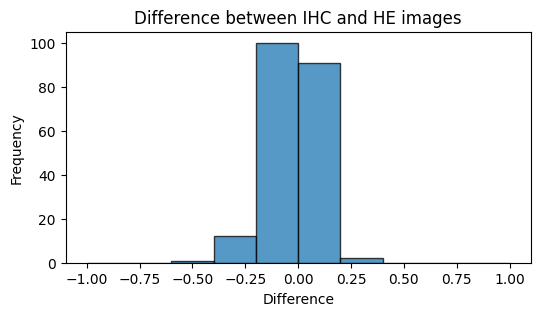

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.hist(merged_df["difference"], bins=10, edgecolor='black', range=(-1, 1), alpha=0.75)
plt.title('Difference between IHC and HE images')
plt.xlabel('Difference')
plt.ylabel('Frequency')


plt.show()

The results demonstrated relatively high accuracy compared to the original report, which achieved an accuracy level of 0.79 by dividing the images into three bins (0-0.2, 0.2-0.5, and >0.5) and training a ResNet-18 model using these labels.

However, with our approach, the tumor ratio distribution was heavily skewed toward the first bin (0-0.2). As a result, the high accuracy does not necessarily indicate a superior method, as it reflects the imbalanced distribution rather than true robustness.

Since our ultimate goal is to accurately determine the tumor ratio from H&E-stained slides, we opted to improve both accuracy and robustness using a different approach.

# Generate IHC images from H&E images

Here, we plan to experiment with two different GAN-based models to generate IHC images from H&E-stained slides. This approach aims to mitigate the influence of the tumor ratio distribution, providing a more balanced and accurate method for generating IHC images and analyzing tumor areas

## Pyramid Pix2pix

For the pix2pix model, the absence of image pairs with pixel-to-pixel accuracy poses a significant challenge. This limitation prevents the MAE loss function, which relies on direct comparison between generated and target images, from functioning effectively when training on our own images.

Fortunately, we identified a modified pyramid pix2pix model equipped with pre-trained weights.

In [ ]:
!git clone https://github.com/bupt-ai-cz/BCI

Cloning into 'BCI'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 277 (delta 65), reused 40 (delta 40), pack-reused 198 (from 1)
Receiving objects: 100% (277/277), 22.08 MiB | 14.99 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [ ]:
%cd /content/drive/MyDrive/CIT5810_Final_Project/BCI/PyramidPix2pix

/content/drive/MyDrive/CIT5810_Final_Project/BCI/PyramidPix2pix


In [ ]:
!ls

data  datasets	evaluate.py  models  options  requirements.txt	test.py  train.py  util


In [ ]:
! pip install -r requirements.txt

In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
image_path = "/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/"
output_dir = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_generated/HE_patch_small/"
tile_size = (256, 256)
overlap = 0
filename = "HE_x22176_y25872.png"
image = load_image(image_path+filename)
tile_image(image, tile_size, overlap, output_dir,"HE")

upload pre-trained model and start generation

In [ ]:
!python test.py --dataroot /content/drive/MyDrive/CIT5810_Final_Project/IHC_generated/HE_patch_small/ \
 --name he_images_pretrained --model test --no_dropout \
 --checkpoints_dir ./trained_on_BCI --results_dir /content/drive/MyDrive/CIT5810_Final_Project/IHC_generated/

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 2                             
          checkpoints_dir: ./trained_on_BCI              	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CIT5810_Final_Project/IHC_generated/HE_patch_small/	[default: ./datasets/BCI]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                   

SSIM score: 0.17902631404010674


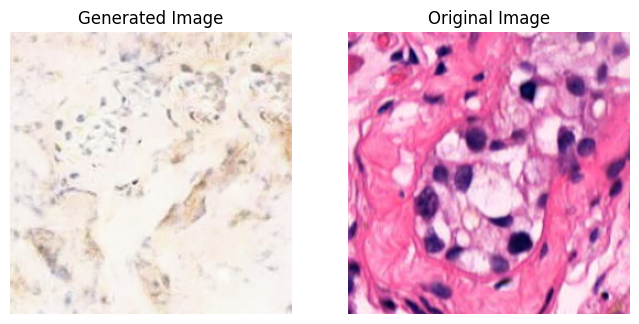

In [ ]:
import matplotlib.pyplot as plt
img1 = Image.open("/content/drive/MyDrive/CIT5810_Final_Project/he_images_pretrained/test_latest/images/HE_0_x1792_y3840_fake.png").convert('RGB')
img2 = Image.open("/content/drive/MyDrive/CIT5810_Final_Project/he_images_pretrained/test_latest/images/HE_0_x1792_y3840_real.png").convert('RGB')

img1_G = img1.convert('L')
img2_G = img2.convert('L')

img1_array = np.array(img1_G)
img2_array = np.array(img2_G)

score, _ = ssim(img1_array, img2_array, full=True)
print("SSIM score:", score)

plt.figure(figsize=(8, 4))

# Display first image
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Generated Image")
plt.axis("off")

# Display second image
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Original Image")
plt.axis("off")

plt.show()

Result pairs have low similarity level

Here, we discovered that our test cases have different magnification level (X40) compared to the dataset used in the published model (X20). And the test cases need to be resized first

In [ ]:
!ls

data  datasets	evaluate.py  models  options  requirements.txt	test.py  train.py  util


In [ ]:
image_path = "/content/drive/MyDrive/CIT5810_Final_Project/HE_paired/"
output_dir = "/content/drive/MyDrive/CIT5810_Final_Project/IHC_generated/HE_patch_shrink/"
tile_size = (256, 256)
overlap = 0
filename = "HE_x22176_y25872.png"
image = load_image(image_path+filename)
new_size = (image.width // 2, image.height // 2)
print(new_size)
image_20x = image.resize(new_size)
tile_image(image_20x, tile_size, overlap, output_dir,"HE")

(2048, 2048)


In [ ]:
!python test.py --dataroot /content/drive/MyDrive/CIT5810_Final_Project/IHC_generated/HE_patch_shrink/ \
 --name he_images_pretrained --model test \
 --crop_size 512 --display_winsize 512  \
 --checkpoints_dir ./trained_on_BCI --results_dir /content/drive/MyDrive/CIT5810_Final_Project/IHC_generated/

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 2                             
          checkpoints_dir: ./trained_on_BCI              	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CIT5810_Final_Project/IHC_generated/HE_patch_shrink/	[default: ./datasets/BCI]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                  

SSIM score: 0.16704720426481753


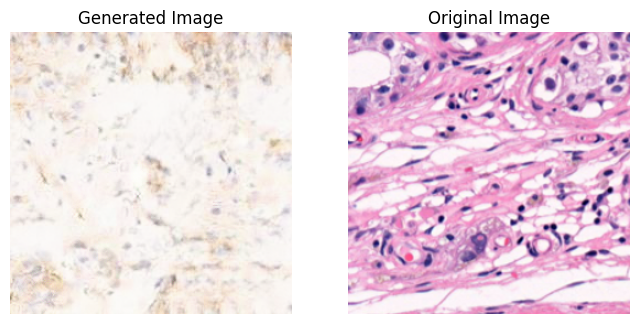

In [ ]:
img1 = Image.open("/content/drive/MyDrive/CIT5810_Final_Project/he_images_pretrained/test_latest/images/HE_x256_y512_fake.png").convert('RGB')
img2 = Image.open("/content/drive/MyDrive/CIT5810_Final_Project/he_images_pretrained/test_latest/images/HE_x256_y512_real.png").convert('RGB')

img1_G = img1.convert('L')
img2_G = img2.convert('L')

img1_array = np.array(img1_G)
img2_array = np.array(img2_G)

score, _ = ssim(img1_array, img2_array, full=True)
print("SSIM score:", score)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Generated Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Original Image")
plt.axis("off")

plt.show()

The Structural Similarity Index Measure (SSIM) for the generated images remains very low, indicating poor resemblance to the target images.

This is likely due to the pre-trained model being trained on a different tissue type (human breast cancer versus mouse testicular seminoma) and targeting a different signal (HER2 versus Ki67). These differences make the pre-trained model unsuitable for our specific task, as the variations in tissue characteristics and staining signals significantly affect the model's performance.

## cycleGAN


Next, we explored a different GAN-based model, CycleGAN, which does not require paired images for training.

CycleGAN works by translating images between two groups using a combination of loss functions: cycle-consistency loss, identity loss, and GAN loss. The cycle-consistency loss ensures that translating an image to the target domain and back to the original domain produces a result close to the input image. The identity loss helps preserve key features during translation.

This approach makes CycleGAN well-suited for our task, where paired training images are unavailable.

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.


In [ ]:

%cd /content/drive/MyDrive/CIT5810_Final_Project/pytorch-CycleGAN-and-pix2pix/

/content/drive/MyDrive/CIT5810_Final_Project/pytorch-CycleGAN-and-pix2pix


In [ ]:
!ls

checkpoints	 final_results.csv  README.md		   test.py
CycleGAN.ipynb	 imgs		    requirements.txt	   train.py
data		 LICENSE	    results		   tumor_ratios_cycleGAN_accuracy_3.csv
datasets	 models		    scripts		   util
docs		 options	    temp_results.csv
environment.yml  pix2pix.ipynb	    temp_results_real.csv


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=de68822ca0020ee1b3c6ea46caf3d860d9cbc9990d4c54e60566cca24f7d1c95
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


We conducted several rounds of training with different resizing strategies. Among these, the original input images, which retained the most detail, produced the highest accuracy.

In [ ]:
!python train.py --dataroot ./datasets/HE --name HE_cyclegan_3 --model cycle_gan  --load_size 2048

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/HE                 	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

In [ ]:
!python test.py --dataroot ./datasets/HE --name HE_cyclegan_3 --model cycle_gan --num_test 186  --load_size 2048 --crop_size 2048

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 2048                          	[default: 256]
                 dataroot: ./datasets/HE                 	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0             

In [ ]:
import os
path = "./results/HE_cyclegan_3/test_latest/images"

generated_images = []
for filename in os.listdir(path):
    if filename.endswith("_fake_B.png"):
        generated_images.append(filename)
print(len(generated_images))

186


In [ ]:
result = []

In [ ]:
from skimage import io
from skimage.measure import regionprops_table
import pandas as pd


for filename in generated_images:
    if filename.endswith(".png"):
        #if filename.startswith("HE_36"):
         # continue
        image_path = os.path.join(path, filename)
        img = io.imread(image_path)
        ihc_h, __, ihc_d, ___ = color_separate(img)
        H_img = np.invert(ihc_h[:,:,2])
        D_img = np.invert(ihc_d[:,:,2])

        #model = StarDist2D.from_pretrained('2D_versatile_fluo')

        H_labels, H_details = model.predict_instances(normalize(H_img))

        D_labels, D_details = model.predict_instances(normalize(D_img))

        H_props = regionprops_table(H_labels, H_img,
                          properties=['area'])
        H_analysis_results = pd.DataFrame(H_props)


        D_props = regionprops_table(D_labels, D_img,
                          properties=['area'])
        D_analysis_results = pd.DataFrame(D_props)

        H_total_area = H_analysis_results["area"].sum()
        D_total_area = D_analysis_results["area"].sum()

        positivity = D_total_area / (D_total_area + H_total_area)
        ratio_formatted = f"{positivity:.4f}"
        print(filename, "'s positivity ratio is: ", ratio_formatted)
        result.append([filename, ratio_formatted])



HE_02_x11088_y29568_fake_B.png 's positivity ratio is:  0.2178
HE_02_x22176_y22176_fake_B.png 's positivity ratio is:  0.0661
HE_02_x22176_y3696_fake_B.png 's positivity ratio is:  0.1581
HE_02_x7392_y29568_fake_B.png 's positivity ratio is:  0.1225
HE_03_x11088_y11088_fake_B.png 's positivity ratio is:  0.2052
HE_03_x18480_y7392_fake_B.png 's positivity ratio is:  0.2817
HE_03_x22176_y7392_fake_B.png 's positivity ratio is:  0.1235
HE_03_x36960_y18480_fake_B.png 's positivity ratio is:  0.3252
HE_03_x36960_y22176_fake_B.png 's positivity ratio is:  0.3949
HE_06_x11088_y25872_fake_B.png 's positivity ratio is:  0.2951
HE_06_x25872_y33264_fake_B.png 's positivity ratio is:  0.0787
HE_06_x29568_y33264_fake_B.png 's positivity ratio is:  0.1634
HE_06_x36960_y29568_fake_B.png 's positivity ratio is:  0.0841
HE_08_x11088_y22176_fake_B.png 's positivity ratio is:  0.0294
HE_08_x14784_y22176_fake_B.png 's positivity ratio is:  0.0271
HE_08_x22176_y11088_fake_B.png 's positivity ratio is:  0.2

In [ ]:
import csv

path = "/content/drive/MyDrive/CIT5810_Final_Project/"
with open(path+"fake_images_2048.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image', 'Tumor_Ratio'])
    writer.writerows(result)

In [ ]:
import os
path = "./results/HE_cyclegan_3/test_latest/images"

generated_images_real = []
for filename in os.listdir(path):
    if filename.endswith("_real_B.png"):
        generated_images_real.append(filename)
print(len(generated_images_real))

186


In [ ]:
from skimage import io
from skimage.measure import regionprops_table
import pandas as pd
import numpy as np
import os

result = []

for filename in generated_images_real:
    if filename.endswith(".png"):
        #if filename.startswith(("HE_36", "HE_61")):
        #  continue

        try:
            # Load the image
            image_path = os.path.join(path, filename)
            img = io.imread(image_path)

            # Perform color separation
            ihc_h, __, ihc_d, ___ = color_separate(img)
            H_img = np.invert(ihc_h[:, :, 2])
            D_img = np.invert(ihc_d[:, :, 2])

            # Ensure proper normalization
            H_img = normalize(H_img)
            D_img = normalize(D_img)

            # Predict instances using the model
            H_labels, H_details = model.predict_instances(H_img)
            D_labels, D_details = model.predict_instances(D_img)

            # Validate that masks are not empty
            if np.sum(H_labels) == 0 or np.sum(D_labels) == 0:
                print(f"Empty mask detected in {filename}, skipping.")
                continue

            # Calculate region properties
            H_props = regionprops_table(H_labels, H_img, properties=['area'])
            D_props = regionprops_table(D_labels, D_img, properties=['area'])

            H_analysis_results = pd.DataFrame(H_props)
            D_analysis_results = pd.DataFrame(D_props)

            # Compute total areas
            H_total_area = H_analysis_results["area"].sum()
            D_total_area = D_analysis_results["area"].sum()

            # Calculate positivity ratio
            positivity = D_total_area / (D_total_area + H_total_area)
            ratio_formatted = f"{positivity:.4f}"
            print(f"{filename}'s positivity ratio is: {ratio_formatted}")

            # Append results
            result.append([filename, ratio_formatted])

            # Save intermediate results every 10 files
            if len(result) % 10 == 0:
                pd.DataFrame(result, columns=['Image', 'Tumor_Ratio']).to_csv("temp_results_real_2048.csv", index=False)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Save final results
pd.DataFrame(result, columns=['Image', 'Tumor_Ratio']).to_csv("real_images_2048.csv", index=False)
print("Processing completed. Results saved to 'final_results.csv'.")

HE_02_x11088_y29568_real_B.png's positivity ratio is: 0.2952
HE_02_x22176_y22176_real_B.png's positivity ratio is: 0.0382
HE_02_x22176_y3696_real_B.png's positivity ratio is: 0.1087
HE_02_x7392_y29568_real_B.png's positivity ratio is: 0.2263
HE_03_x11088_y11088_real_B.png's positivity ratio is: 0.4026
HE_03_x18480_y7392_real_B.png's positivity ratio is: 0.3757
HE_03_x22176_y7392_real_B.png's positivity ratio is: 0.1674
HE_03_x36960_y18480_real_B.png's positivity ratio is: 0.1165
HE_03_x36960_y22176_real_B.png's positivity ratio is: 0.1861
HE_06_x11088_y25872_real_B.png's positivity ratio is: 0.1953
HE_06_x25872_y33264_real_B.png's positivity ratio is: 0.1190
HE_06_x29568_y33264_real_B.png's positivity ratio is: 0.2766
HE_06_x36960_y29568_real_B.png's positivity ratio is: 0.2131
HE_08_x11088_y22176_real_B.png's positivity ratio is: 0.2041
HE_08_x14784_y22176_real_B.png's positivity ratio is: 0.2614
HE_08_x22176_y11088_real_B.png's positivity ratio is: 0.2241
HE_09_x11088_y25872_real_B.p

In [ ]:
import csv

path = "/content/drive/MyDrive/CIT5810_Final_Project/"
with open(path+"final_results.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image', 'Tumor_Ratio'])
    writer.writerows(result)

In [ ]:
with open(path+"final_results_real.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image', 'Tumor_Ratio'])
    writer.writerows(result)

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/CIT5810_Final_Project/"

df_IHC_F = pd.read_csv(file_path + "fake_images_2048.csv")
df_IHC = pd.read_csv(file_path + "pytorch-CycleGAN-and-pix2pix/real_images_2048.csv")

df_IHC_F['Image'] = df_IHC_F['Image'].str.replace('fake', 'real', regex=False)
#df_IHC_F['Image'] = df_IHC_F['Image'].str.replace('_fake_B', '', regex=False)

df_IHC.rename(columns={'Tumor_Ratio': 'Tumor_Ratio_IHC'}, inplace=True)
df_IHC_F.rename(columns={'Tumor_Ratio': 'Tumor_Ratio_FAKE'}, inplace=True)

merged_df = pd.merge(df_IHC, df_IHC_F, on='Image', how='inner')

merged_df["difference"] = merged_df["Tumor_Ratio_IHC"] - merged_df["Tumor_Ratio_FAKE"]

print(merged_df.head())

                            Image  Tumor_Ratio_IHC  Tumor_Ratio_FAKE  \
0  HE_02_x11088_y29568_real_B.png           0.2952            0.2178   
1  HE_02_x22176_y22176_real_B.png           0.0382            0.0661   
2   HE_02_x22176_y3696_real_B.png           0.1087            0.1581   
3   HE_02_x7392_y29568_real_B.png           0.2263            0.1225   
4  HE_03_x11088_y11088_real_B.png           0.4026            0.2052   

   difference  
0      0.0774  
1     -0.0279  
2     -0.0494  
3      0.1038  
4      0.1974  


In [ ]:
MSE = np.mean(merged_df["difference"]**2)
print("MSE:", MSE)

MSE: 0.03295454279569893


In [ ]:
MAE = np.mean(abs(merged_df["difference"]))
print("MAE:", MAE)

MAE: 0.1402720430107527


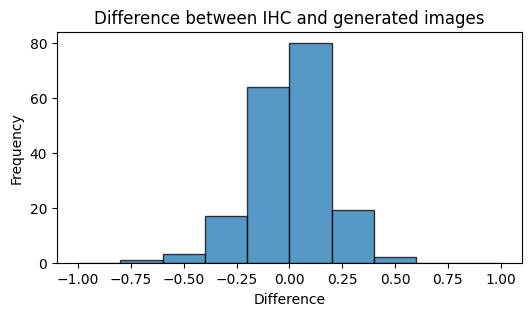

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.hist(merged_df["difference"], bins=10, edgecolor='black', range=(-1, 1), alpha=0.75)
plt.title('Difference between IHC and generated images')
plt.xlabel('Difference')
plt.ylabel('Frequency')


plt.show()

In [ ]:
bins = [0, 0.2, 0.5, 1.0]
labels = ["0-0.2", "0.2-0.5", "0.5-1"]

merged_df["IHC_bin"] = pd.cut(merged_df["Tumor_Ratio_IHC"], bins=bins, labels=labels, include_lowest=True)
merged_df["FAKE_bin"] = pd.cut(merged_df["Tumor_Ratio_FAKE"], bins=bins, labels=labels, include_lowest=True)

merged_df["correct"] = merged_df["IHC_bin"] == merged_df["FAKE_bin"]
accuracy = merged_df["correct"].mean()

print("Accuracy:", accuracy)
print(merged_df.head())

Accuracy: 0.543010752688172
                            Image  Tumor_Ratio_IHC  Tumor_Ratio_FAKE  \
0  HE_02_x11088_y29568_real_B.png           0.2952            0.2178   
1  HE_02_x22176_y22176_real_B.png           0.0382            0.0661   
2   HE_02_x22176_y3696_real_B.png           0.1087            0.1581   
3   HE_02_x7392_y29568_real_B.png           0.2263            0.1225   
4  HE_03_x11088_y11088_real_B.png           0.4026            0.2052   

   difference  IHC_bin FAKE_bin  correct  
0      0.0774  0.2-0.5  0.2-0.5     True  
1     -0.0279    0-0.2    0-0.2     True  
2     -0.0494    0-0.2    0-0.2     True  
3      0.1038  0.2-0.5    0-0.2    False  
4      0.1974  0.2-0.5  0.2-0.5     True  


In [ ]:
merged_df.to_csv(file_path + "tumor_ratios_cycleGAN_accuracy_3.csv", index=False)

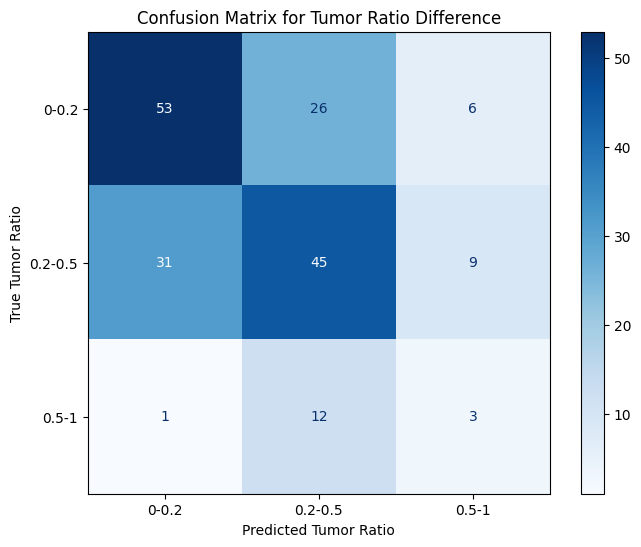

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = merged_df["IHC_bin"]
y_pred = merged_df["FAKE_bin"]
cm = confusion_matrix(y_true, y_pred, labels=["0-0.2", "0.2-0.5", "0.5-1"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0-0.2", "0.2-0.5", "0.5-1"])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix for Tumor Ratio Difference")
plt.xlabel("Predicted Tumor Ratio")
plt.ylabel("True Tumor Ratio")
plt.show()

The highest accuracy achieved in our current setup is approximately 0.6, which may initially seem low.

However, a transformer-based model listed below achieves an accuracy of 0.68 in determining cancer stages using the generated images. This highlights that the accuracy of machine learning models, even with relatively complex architectures, still falls short of the performance of a trained pathologist.

To improve accuracy further, we can consider employing more advanced generator designs or integrating state-of-the-art backbone architectures. Additionally, increasing the number of training epochs may enhance the model's ability to learn detailed features and achieve better convergence, potentially narrowing the gap between machine learning methods and expert pathologists.

## VirtualMultiplexer (CUT)

In [ ]:
%cd /content/drive/MyDrive/CIT5810_Final_Project/

/content/drive/MyDrive/CIT5810_Final_Project


In [ ]:
!git clone https://github.com/AI4SCR/VirtualMultiplexer

Cloning into 'VirtualMultiplexer'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 79 (delta 20), reused 66 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 2.76 MiB | 18.01 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O miniconda.sh
!bash miniconda.sh -b -f -p /usr/local

--2024-11-19 18:22:54--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148337011 (141M) [application/octet-stream]
Saving to: ‘miniconda.sh’

miniconda.sh        100%[===================>] 141.46M  66.8MB/s    in 2.1s    

2024-11-19 18:22:57 (66.8 MB/s) - ‘miniconda.sh’ saved [148337011/148337011]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of pack

In [ ]:
os.environ["PATH"] = "/usr/local/bin:" + os.environ["PATH"]

In [ ]:
!conda --version

conda 24.9.2


In [ ]:
%cd VirtualMultiplexer

/content/drive/MyDrive/CIT5810_Final_Project/VirtualMultiplexer


In [ ]:
!ls

bin	 downstream_tasks  figs		   __init__.py	README.md
configs  environment.yml   i2iTranslation  LICENSE


In [ ]:
!conda env create -f environment.yml


/usr/local/lib/python3.12/argparse.py:2006: FutureWarning: `remote_definition` is deprecated and will be removed in 25.9. Use `conda env create --file=URL` instead.
  action(self, namespace, argument_values, option_string)
Channels:
 - defaults
Platform: linux-64
Solving environment: \ failed

PackagesNotFoundError: The following packages are not available from current channels:

  - zlib==1.2.13=h5a0b063_0
  - xz==5.4.2=h80987f9_0
  - wheel==0.41.2=py311hca03da5_0
  - tk==8.6.12=hb8d0fd4_0
  - sqlite==3.41.2=h80987f9_0
  - setuptools==68.0.0=py311hca03da5_0
  - readline==8.2=h1a28f6b_0
  - python==3.11.5=hb885b13_0
  - pip==23.2.1=py311hca03da5_0
  - openssl==3.0.11=h1a28f6b_2
  - ncurses==6.4=h313beb8_0
  - libffi==3.4.4=hca03da5_0
  - ca-certificates==2023.08.22=hca03da5_0
  - bzip2==1.0.8=h620ffc9_4

Current channels:

  - https://repo.anaconda.com/pkgs/main
  - https://repo.anaconda.com/pkgs/r

To search for alternate channels that may provide the conda package you're
looking fo

In [ ]:
!conda init

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.12/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
modified      /root/.bashrc

==> For changes to take effect, close and re-open your current shell. <==



In [ ]:
!source activate virtualmultiplexer


EnvironmentNameNotFound: Could not find conda environment: virtualmultiplexer
You can list all discoverable environments with `conda info --envs`.




In [ ]:
!sudo rm -rf /usr/local/miniconda


# Results and Conclusion

#